In [1]:
import os
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project'

In [2]:
os.chdir('/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project/')
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC_Bootcamp/Project'

In [3]:
# Import our dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup as bs

# Getting Stocks Data from Yahoo Finance

In [4]:
# Import our input datasets
aapl_sp_df = pd.read_csv('AAPL_SP.csv')

In [5]:
aapl_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
aapl_sp_df["Ticker"] = "AAPL"
aapl_sp_df["Code"] = aapl_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
aapl_sp_df = aapl_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
aapl_sp_df['Date'] = pd.to_datetime(aapl_sp_df['Date'])
aapl_sp_df

,Ticker,Date,Open,High,Low,Close,AdjClose,Volume,Code
0,AAPL,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,AAPL_1980-12-12
1,AAPL,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,AAPL_1980-12-15
2,AAPL,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,AAPL_1980-12-16
3,AAPL,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,AAPL_1980-12-17
4,AAPL,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,AAPL_1980-12-18
...,...,...,...,...,...,...,...,...,...
10476,AAPL,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.929993,71007500,AAPL_2022-07-01
10477,AAPL,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.559998,73353800,AAPL_2022-07-05
10478,AAPL,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.919998,74064300,AAPL_2022-07-06
10479,AAPL,2022-07-07,143.289993,146.550003,143.279999,146.350006,146.350006,66253700,AAPL_2022-07-07


In [6]:
aapl_sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    10481 non-null  object        
 1   Date      10481 non-null  datetime64[ns]
 2   Open      10481 non-null  float64       
 3   High      10481 non-null  float64       
 4   Low       10481 non-null  float64       
 5   Close     10481 non-null  float64       
 6   AdjClose  10481 non-null  float64       
 7   Volume    10481 non-null  int64         
 8   Code      10481 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 737.1+ KB


In [16]:
aapl_sp_df.describe()

,Open,High,Low,Close,AdjClose,Volume
count,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,1.048100e+04
mean,14.912202,15.078553,14.747483,14.919155,14.286838,3.305308e+08
std,32.193447,32.575680,31.822231,32.214075,31.927916,3.387520e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.290000,0.276786,0.283482,0.235637,1.234016e+08
50%,0.475446,0.484375,0.466518,0.475446,0.393155,2.180976e+08
75%,15.030714,15.171429,14.952143,15.014643,12.927811,4.099760e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [12]:
df = pd.read_csv('AAPL_SP.csv')
df1 = df[["Open", "Close", "Volume"]]

In [15]:
df1.describe()

,Open,Close,Volume
count,10481.000000,10481.000000,1.048100e+04
mean,14.912202,14.919155,3.305308e+08
std,32.193447,32.214075,3.387520e+08
min,0.049665,0.049107,0.000000e+00
25%,0.283482,0.283482,1.234016e+08
50%,0.475446,0.475446,2.180976e+08
75%,15.030714,15.014643,4.099760e+08
max,182.630005,182.009995,7.421641e+09


In [69]:
aapl_sp_df.to_csv("aapl_sp_to_sql.csv", index=False)

<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

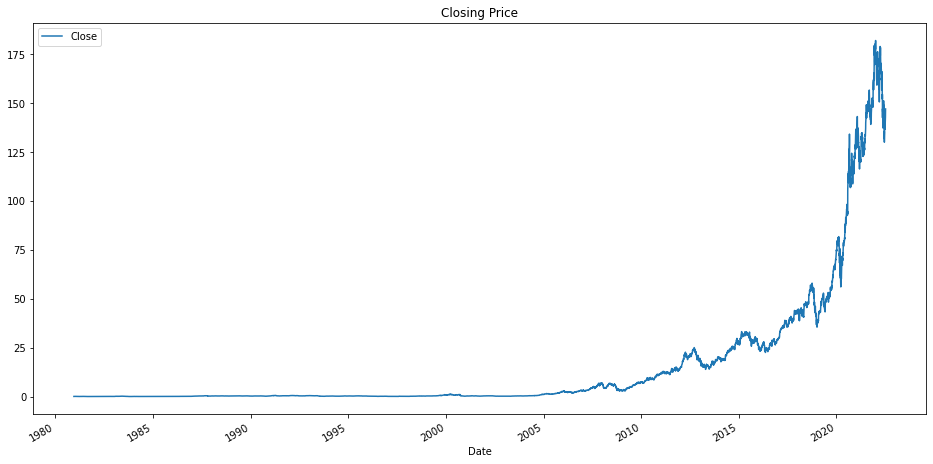

In [12]:
aapl_sp_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Closing Price")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

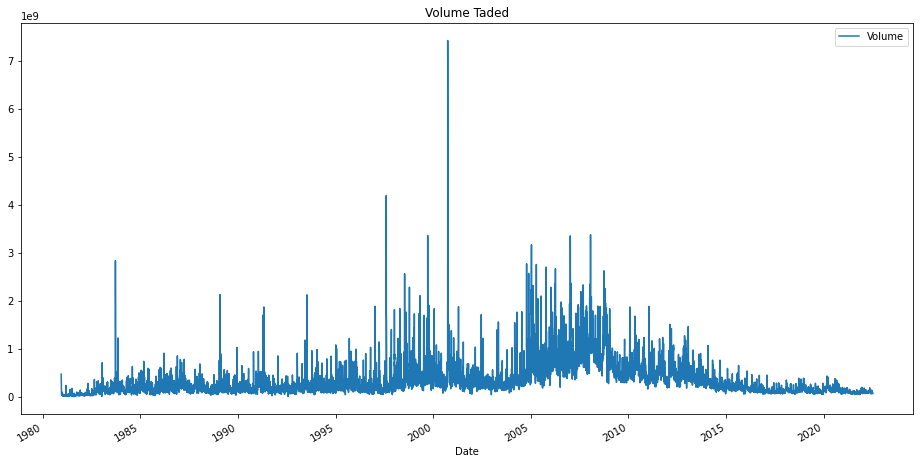

In [13]:
aapl_sp_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [80]:
amzn_sp_df = pd.read_csv('AMZN_SP.csv')

In [81]:
amzn_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
amzn_sp_df["Ticker"] = "AMZN"
amzn_sp_df["Code"] = amzn_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
amzn_sp_df = amzn_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
amzn_sp_df['Date'] = pd.to_datetime(amzn_sp_df['Date'])
amzn_sp_df

,Ticker,Date,Open,High,Low,Close,AdjClose,Volume,Code
0,AMZN,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,AMZN_1997-05-15
1,AMZN,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,AMZN_1997-05-16
2,AMZN,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,AMZN_1997-05-19
3,AMZN,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,AMZN_1997-05-20
4,AMZN,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,AMZN_1997-05-21
...,...,...,...,...,...,...,...,...,...
6324,AMZN,2022-07-01,106.290001,109.750000,105.849998,109.559998,109.559998,72952000,AMZN_2022-07-01
6325,AMZN,2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700,AMZN_2022-07-05
6326,AMZN,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900,AMZN_2022-07-06
6327,AMZN,2022-07-07,113.849998,116.989998,113.489998,116.330002,116.330002,57872300,AMZN_2022-07-07


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

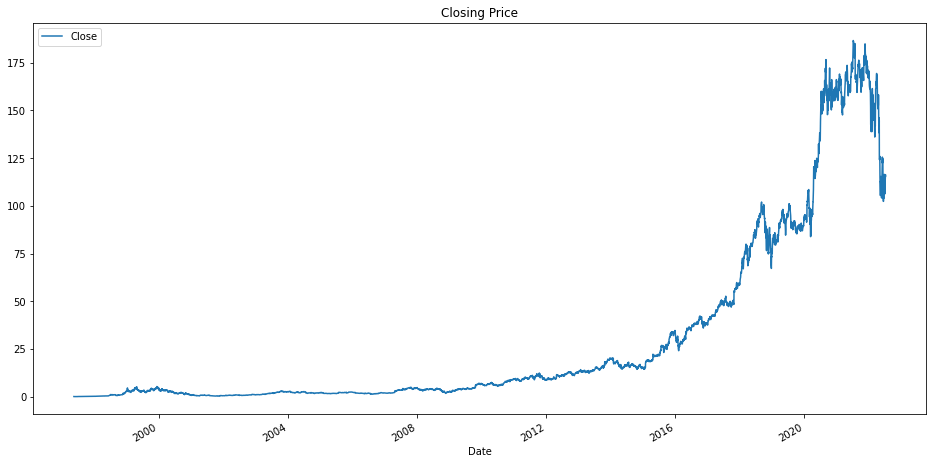

In [82]:
amzn_sp_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Closing Price")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

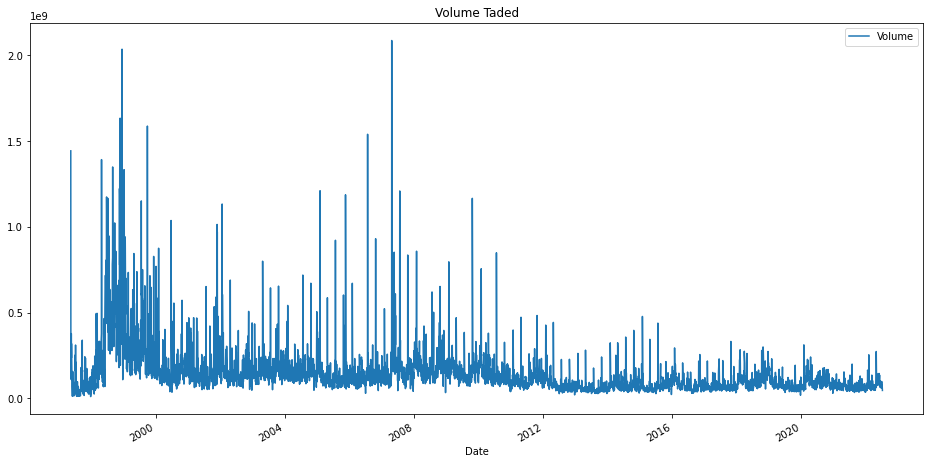

In [83]:
amzn_sp_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [84]:
amzn_sp_df.to_csv("amzn_sp_to_sql.csv", index=False)

In [87]:
nflx_sp_df = pd.read_csv('NFLX_SP.csv')

In [88]:
nflx_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
nflx_sp_df["Ticker"] = "NFLX"
nflx_sp_df["Code"] = nflx_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
nflx_sp_df = nflx_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
nflx_sp_df['Date'] = pd.to_datetime(nflx_sp_df['Date'])
nflx_sp_df

In [89]:
nflx_sp_df

,Ticker,Date,Open,High,Low,Close,AdjClose,Volume,Code
0,NFLX,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NFLX_2002-05-23
1,NFLX,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,NFLX_2002-05-24
2,NFLX,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,NFLX_2002-05-28
3,NFLX,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,NFLX_2002-05-29
4,NFLX,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,NFLX_2002-05-30
...,...,...,...,...,...,...,...,...,...
5062,NFLX,2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5194700,NFLX_2022-07-01
5063,NFLX,2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300,NFLX_2022-07-05
5064,NFLX,2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400,NFLX_2022-07-06
5065,NFLX,2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500,NFLX_2022-07-07


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

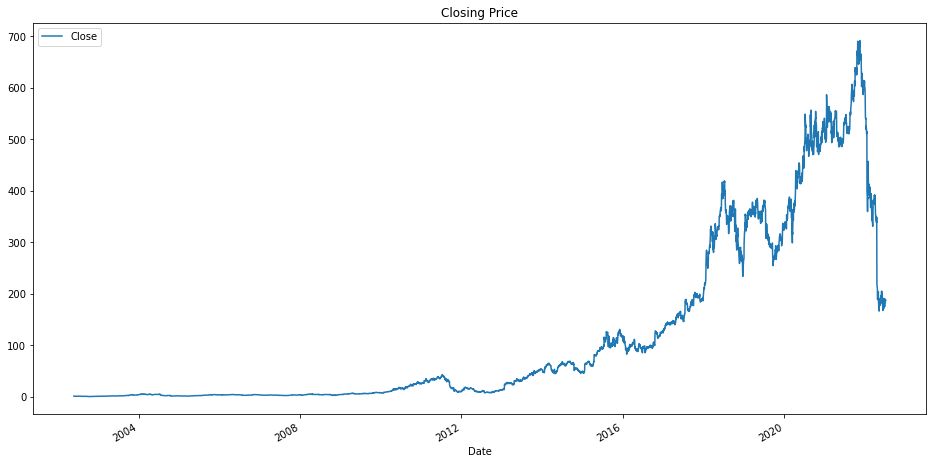

In [90]:
nflx_sp_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Closing Price")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

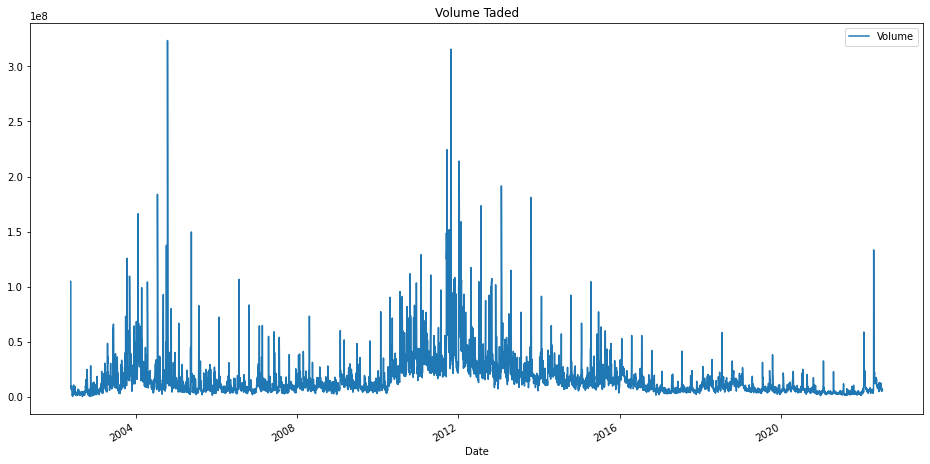

In [91]:
nflx_sp_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [95]:
meta_sp_df = pd.read_csv('META_SP.csv')

In [96]:
meta_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
meta_sp_df["Ticker"] = "META"
meta_sp_df["Code"] = meta_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
meta_sp_df = meta_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
meta_sp_df['Date'] = pd.to_datetime(meta_sp_df['Date'])
meta_sp_df

,Ticker,Date,Open,High,Low,Close,AdjClose,Volume,Code
0,META,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,META_2012-05-18
1,META,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,META_2012-05-21
2,META,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,META_2012-05-22
3,META,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,META_2012-05-23
4,META,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,META_2012-05-24
...,...,...,...,...,...,...,...,...,...
2546,META,2022-07-01,160.309998,160.619995,155.000000,160.029999,160.029999,31400700,META_2022-07-01
2547,META,2022-07-05,158.139999,168.250000,157.020004,168.190002,168.190002,28618600,META_2022-07-05
2548,META,2022-07-06,168.199997,171.589996,165.460007,169.770004,169.770004,23085900,META_2022-07-06
2549,META,2022-07-07,169.449997,172.720001,167.779999,172.190002,172.190002,24083400,META_2022-07-07


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

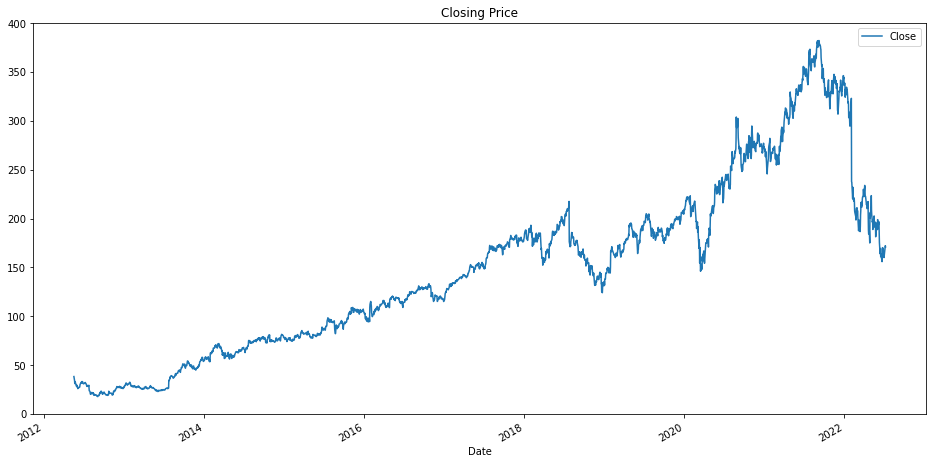

In [97]:
meta_sp_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Closing Price")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

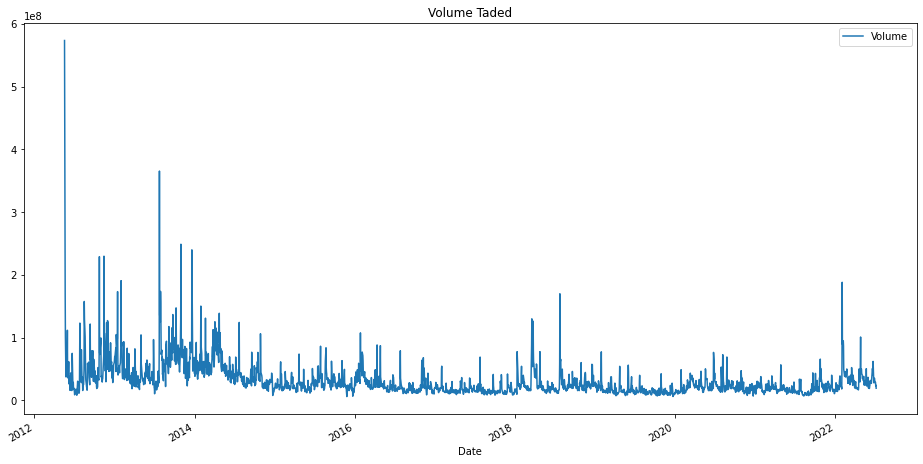

In [98]:
meta_sp_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [110]:
meta_sp_df.to_csv("meta_sp_to_sql.csv", index=False)

In [101]:
tsla_sp_df = pd.read_csv('TSLA_SP.csv')

In [103]:
tsla_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
tsla_sp_df["Ticker"] = "TSLA"
tsla_sp_df["Code"] = tsla_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
tsla_sp_df = tsla_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
tsla_sp_df['Date'] = pd.to_datetime(tsla_sp_df['Date'])
tsla_sp_df

,Ticker,Date,Open,High,Low,Close,AdjClose,Volume,Code
0,TSLA,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,TSLA_2010-06-29
1,TSLA,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,TSLA_2010-06-30
2,TSLA,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,TSLA_2010-07-01
3,TSLA,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,TSLA_2010-07-02
4,TSLA,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,TSLA_2010-07-06
...,...,...,...,...,...,...,...,...,...
3023,TSLA,2022-07-01,681.000000,690.690002,666.359985,681.789978,681.789978,24781500,TSLA_2022-07-01
3024,TSLA,2022-07-05,669.000000,699.440002,648.500000,699.200012,699.200012,28193700,TSLA_2022-07-05
3025,TSLA,2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200,TSLA_2022-07-06
3026,TSLA,2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200,TSLA_2022-07-07


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

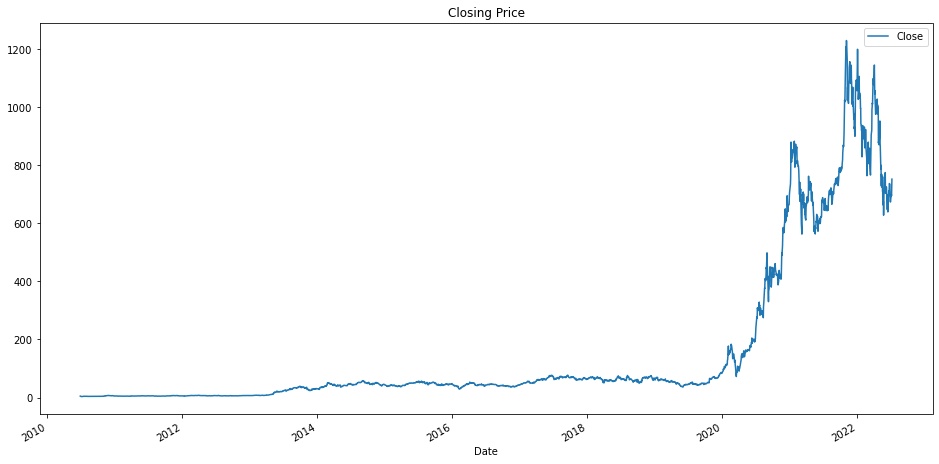

In [104]:
tsla_sp_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Closing Price")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

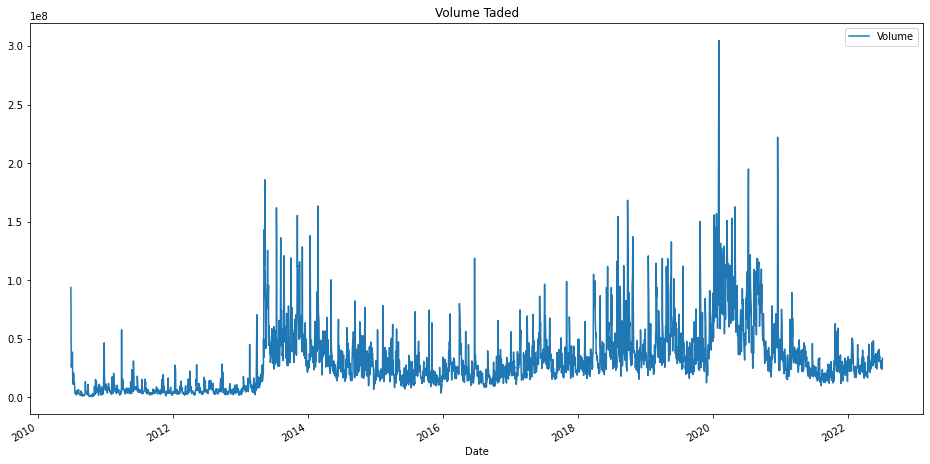

In [105]:
tsla_sp_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [115]:
tsla_sp_df.to_csv("tsla_sp_to_sql.csv", index=False)

In [111]:
goog_sp_df = pd.read_csv('GOOG_SP.csv')

In [112]:
goog_sp_df.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
goog_sp_df["Ticker"] = "GOOG"
goog_sp_df["Code"] = goog_sp_df[["Ticker", "Date"]].apply(lambda x: "_".join(x), axis = 1)
goog_sp_df = goog_sp_df[["Ticker", "Date", "Open", "High", "Low", "Close", "AdjClose", "Volume", "Code"]]
goog_sp_df['Date'] = pd.to_datetime(goog_sp_df['Date'])
goog_sp_df

,Ticker,Date,Open,High,Low,Close,AdjClose,Volume,Code
0,GOOG,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,GOOG_2004-08-19
1,GOOG,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,GOOG_2004-08-20
2,GOOG,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,GOOG_2004-08-23
3,GOOG,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,GOOG_2004-08-24
4,GOOG,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,GOOG_2004-08-25
...,...,...,...,...,...,...,...,...,...
4498,GOOG,2022-07-01,2166.739990,2196.126953,2142.100098,2181.620117,2181.620117,1550600,GOOG_2022-07-01
4499,GOOG,2022-07-05,2150.290039,2281.052002,2124.989990,2277.739990,2277.739990,1819900,GOOG_2022-07-05
4500,GOOG,2022-07-06,2281.840088,2327.040039,2245.010010,2304.270020,2304.270020,1442600,GOOG_2022-07-06
4501,GOOG,2022-07-07,2320.159912,2397.239990,2310.679932,2386.120117,2386.120117,1609200,GOOG_2022-07-07


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

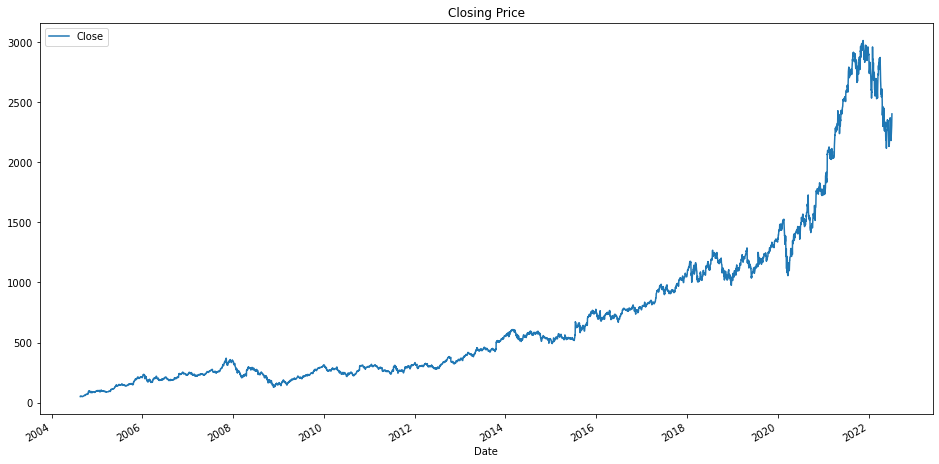

In [116]:
goog_sp_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Closing Price")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

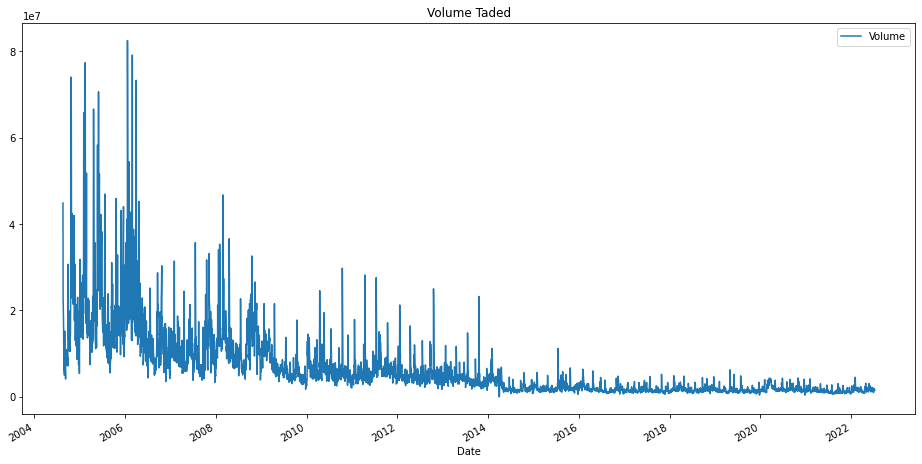

In [117]:
goog_sp_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [118]:
goog_sp_df.to_csv("goog_sp_to_sql.csv", index=False)

In [132]:
tsla_sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ticker    3028 non-null   object        
 1   Date      3028 non-null   datetime64[ns]
 2   Open      3028 non-null   float64       
 3   High      3028 non-null   float64       
 4   Low       3028 non-null   float64       
 5   Close     3028 non-null   float64       
 6   AdjClose  3028 non-null   float64       
 7   Volume    3028 non-null   int64         
 8   Code      3028 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 213.0+ KB


# AAPL

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import tensorflow as tf

In [15]:
aapl_sp_df.shape

(10481, 9)

## Data Preparation for ML

In [26]:
training_df = aapl_sp_df[8600:10000]

In [27]:
training_df.shape

(1400, 9)

In [29]:
test_df = aapl_sp_df[10000:]

In [30]:
test_df.shape

(481, 9)

In [31]:
#aapl_training_df = aapl_sp_df[(aapl_sp_df['Date'] > "2016-07-01") & (aapl_sp_df['Date'] < "2020-07-01")]

<AxesSubplot:title={'center':'Close'}, xlabel='Date'>

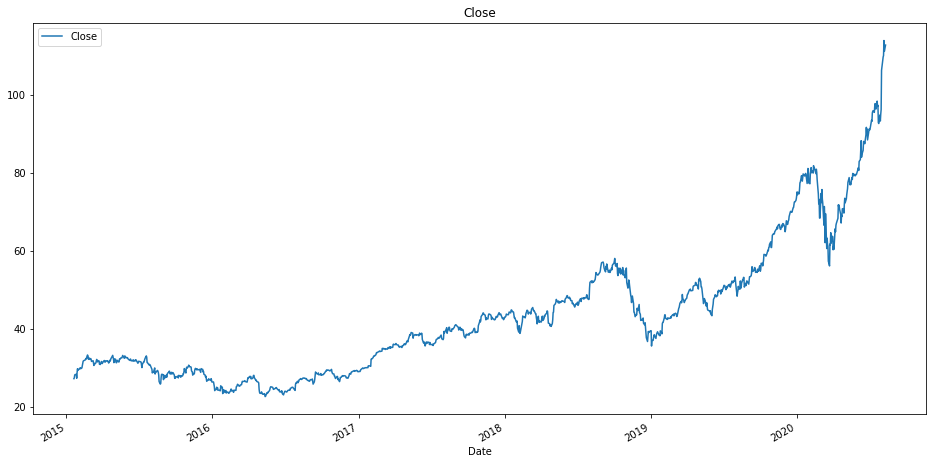

In [32]:
training_df.plot(x="Date", y="Close", figsize = (16, 8), title = "Close")

<AxesSubplot:title={'center':'Volume Taded'}, xlabel='Date'>

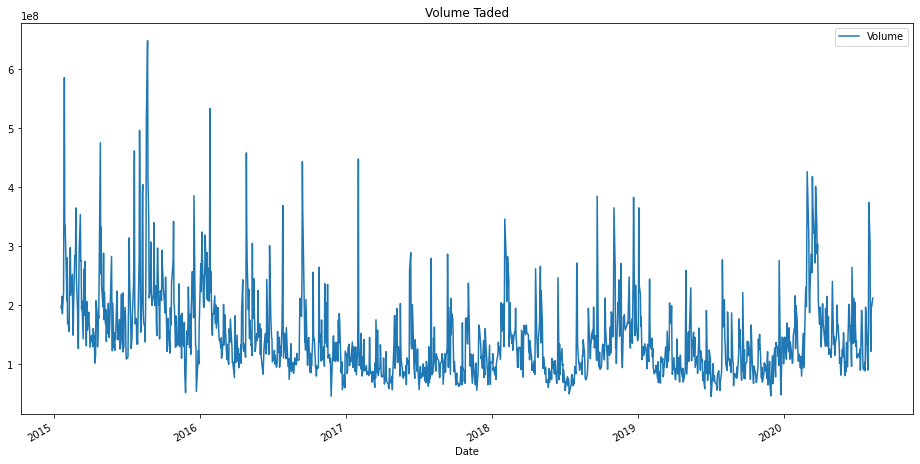

In [33]:
training_df.plot(x="Date", y="Volume", figsize = (16, 8), title = "Volume Taded")

In [34]:
training_set = training_df.iloc[:, 2:3].values

In [36]:
training_set.shape 

(1400, 1)

In [37]:
# Normalizing data, scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [38]:
training_set_scaled.shape

(1400, 1)

In [40]:
X_train = []
y_train = []

for i in range(60, 1400):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Deep Learning

In [42]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
modelo = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
42/42 [==============================] - 6s 60ms/step - loss: 0.0076
Epoch 2/100
42/42 [==============================] - 2s 50ms/step - loss: 0.0020
Epoch 3/100
42/42 [==============================] - 2s 49ms/step - loss: 0.0016
Epoch 4/100
42/42 [==============================] - 2s 47ms/step - loss: 0.0014
Epoch 5/100
42/42 [==============================] - 2s 47ms/step - loss: 0.0012
Epoch 6/100
42/42 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 7/100
42/42 [==============================] - 2s 47ms/step - loss: 0.0012
Epoch 8/100
42/42 [==============================] - 2s 47ms/step - loss: 8.1489e-04
Epoch 9/100
42/42 [==============================] - 2s 47ms/step - loss: 8.8650e-04
Epoch 10/100
42/42 [==============================] - 2s 48ms/step - loss: 7.2491e-04
Epoch 11/100
42/42 [==============================] - 2s 48ms/step - loss: 7.2994e-04
Epoch 12/100
42/42 [==============================] - 2s 47ms/step - loss: 7.5754e-04
Epoch

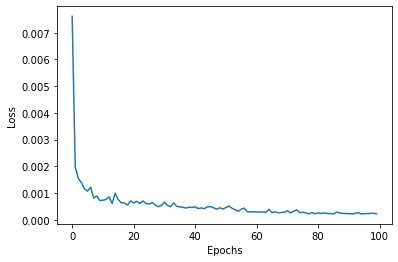

In [45]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [46]:
real_stock_price = test_df.iloc[: , 2:3].values

In [47]:
real_stock_price.shape

(481, 1)

In [49]:
dataset_total = pd.concat([training_df['Open'], test_df['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 481):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
X_test.shape

(421, 60, 1)

In [50]:
predicted_stock_price = model.predict(X_test)

14/14 [==============================] - 1s 52ms/step


In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

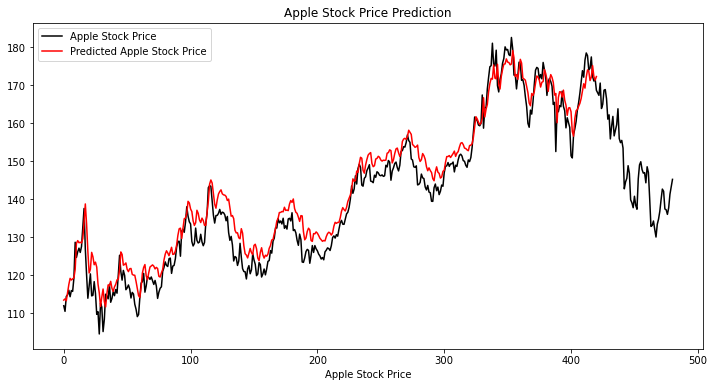

In [52]:
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()

# Webscraping

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
req = requests.get(url)
print(req)
# <Response[200]>

<Response [200]>


In [6]:
soup = bs(req.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [7]:
soup = bs(req.content, 'html.parser')

In [8]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of S&amp;P 500 companies - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d6d261e7-d9d3-41b2-8b5c-e1952895ee3a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_S\u0026P_500_companies","wgTitle":"List of S\u0026P 500 companies","wgCurRevisionId":1097161042,"wgRevisionId":1097161042,"wgArticleId":2676045,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from November 2019","Article

In [9]:
table = soup.find("table", class_= "wikitable sortable")

In [10]:
test = table.find_all("tr")

In [11]:
len(test)

504

In [166]:
pip install lxml

     |████████████████████████████████| 3.4 MB 4.5 MB/s eta 0:00:01
  Created wheel for lxml: filename=lxml-4.9.1-cp38-cp38-macosx_11_0_arm64.whl size=1503227 sha256=3b13b611421ab24336e4c3474843ac3e7a202672246cd0a1fc5de407a3500331
  Stored in directory: /Users/wimal/Library/Caches/pip/wheels/03/02/29/e73e6bd0b04b9ddb5e40fe507107c1e6e148bf8521a1964685
Successfully built lxml
Note: you may need to restart the kernel to use updated packages.


In [16]:
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [17]:
# drop the unwanted columns
data = df.drop(["SEC filings"], axis=1)

In [18]:
data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date first added       458 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [20]:
data = data.rename(columns={"GICS Sector": "GICS_Sector", "GICS Sub-Industry": "GICS_Sub_Industry","Headquarters Location": "Headquarters", "Date first added": "Date_First_Added"})
print(data.head())

  Symbol     Security  GICS_Sector         GICS_Sub_Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

              Headquarters Date_First_Added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [21]:
data.head()

,Symbol,Security,GICS_Sector,GICS_Sub_Industry,Headquarters,Date_First_Added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [19]:
data = data.rename(columns={"GICS Sector": "GICS_Sector"})

In [20]:
data

,Symbol,Security,GICS_Sector,GICS_Sub_Industry,Headquarters,Date_First_Added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [26]:
data.to_csv("companies.csv")

In [22]:
data["CIK"].dtypes

dtype('int64')

In [23]:
data.dtypes

Symbol               object
Security             object
GICS_Sector          object
GICS_Sub_Industry    object
Headquarters         object
Date_First_Added     object
CIK                   int64
Founded              object
dtype: object